In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

import datetime as dt
from datetime import timezone, timedelta

In [2]:
timezone_offset = -5.0  # Eastern Standard Time (UTC−08:00)
tzinfo = timezone(timedelta(hours=timezone_offset))
current_dateTime = datetime.now(tzinfo)

In [3]:
begin_date = '2024-08-12T00:00:00.000-05:00'
end_date = current_dateTime.strftime('%Y-%m-%dT%H:%M:%S.%f%z')


In [4]:
#Read in raw stream guage data
#pompton_plains = pd.read_csv('data/archive/pompton_plains.txt', sep='\t', skiprows=27)
pompton_plains = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=01388500&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
pompton_plains = pompton_plains.iloc[1: , :]
pompton_plains['194446_00065'] = pompton_plains['194446_00065'].astype(float)
pompton_plains = pompton_plains[['datetime','194446_00065']]
pompton_plains = pompton_plains.set_index('datetime')
pompton_plains['item_id'] = 'pompton_gage'
pompton_plains.rename(columns={'194446_00065': 'series'}, inplace=True)
pompton_plains.head()

,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage


In [5]:
#pequannock_riverdale = pd.read_csv('data/archive/pequannock_riverdale.txt', sep='\t', skiprows=26)
pequannock_riverdale = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01382800&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
pequannock_riverdale = pequannock_riverdale.iloc[1: , :]
pequannock_riverdale['194387_00065'] = pequannock_riverdale['194387_00065'].astype(float)
pequannock_riverdale = pequannock_riverdale[['datetime','194387_00065']]
pequannock_riverdale = pequannock_riverdale.set_index('datetime')
pequannock_riverdale['item_id'] = 'riverdale_gage'
pequannock_riverdale.rename(columns={'194387_00065': 'series'}, inplace=True)
pequannock_riverdale.head()

,series,item_id
datetime,,
2024-08-12 01:00,2.30,riverdale_gage
2024-08-12 01:15,2.30,riverdale_gage
2024-08-12 01:30,2.30,riverdale_gage
2024-08-12 01:45,2.29,riverdale_gage
2024-08-12 02:00,2.29,riverdale_gage


In [6]:
#ramapo_pompton = pd.read_csv('data/archive/ramapo_pompton.txt', sep='\t', skiprows=26)
ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=26)
ramapo_pompton = ramapo_pompton.iloc[1: , :]
ramapo_pompton

,agency_cd,site_no,datetime,tz_cd,194435_00065,194435_00065_cd
1,USGS,01388000,2024-08-12 01:00,EDT,8.14,P
2,USGS,01388000,2024-08-12 01:05,EDT,8.14,P
3,USGS,01388000,2024-08-12 01:10,EDT,8.13,P
4,USGS,01388000,2024-08-12 01:15,EDT,8.13,P
5,USGS,01388000,2024-08-12 01:20,EDT,8.13,P
...,...,...,...,...,...,...
972,USGS,01388000,2024-08-15 09:55,EDT,7.54,P
973,USGS,01388000,2024-08-15 10:00,EDT,7.54,P
974,USGS,01388000,2024-08-15 10:05,EDT,7.54,P
975,USGS,01388000,2024-08-15 10:10,EDT,7.54,P


In [7]:
ramapo_pompton['194435_00065'] = ramapo_pompton['194435_00065'].astype(float)
ramapo_pompton = ramapo_pompton[['datetime','194435_00065']]
ramapo_pompton = ramapo_pompton.set_index('datetime')
ramapo_pompton['item_id'] = 'ramapo_gage'
ramapo_pompton.rename(columns={'194435_00065': 'series'}, inplace=True)
ramapo_pompton.head()

,series,item_id
datetime,,
2024-08-12 01:00,8.14,ramapo_gage
2024-08-12 01:05,8.14,ramapo_gage
2024-08-12 01:10,8.13,ramapo_gage
2024-08-12 01:15,8.13,ramapo_gage
2024-08-12 01:20,8.13,ramapo_gage


In [8]:
#ppp = pd.read_csv('data/archive/pompton_plains_precip.txt',sep='\t', skiprows=26)
ppp = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=405811074165501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
ppp = ppp.iloc[1: , :]
ppp['99543_00045'] = ppp['99543_00045'].astype(float)
ppp = ppp.rename(columns={"99543_00045": "pompton_precip"})
ppp = ppp[['datetime','pompton_precip']]
ppp = ppp.set_index('datetime')
ppp['item_id'] = 'pompton_precip'
ppp.rename(columns={'pompton_precip': 'series'}, inplace=True)
ppp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,pompton_precip
2024-08-12 01:15,0.0,pompton_precip
2024-08-12 01:30,0.0,pompton_precip
2024-08-12 01:45,0.0,pompton_precip
2024-08-12 02:00,0.0,pompton_precip


In [9]:
#rpp = pd.read_csv('data/archive/ramapo_pompton_precip.txt',sep='\t', skiprows=26)
rpp = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=410239074173501&parameterCd=00045&startDT='+begin_date+'&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
rpp = rpp.iloc[1: , :]
rpp['99565_00045'] = rpp['99565_00045'].astype(float)
rpp = rpp.rename(columns={"99565_00045": "ramapo_precip"})
rpp = rpp[['datetime','ramapo_precip']]
rpp = rpp.set_index('datetime')
rpp['item_id'] = 'ramapo_precip'
rpp.rename(columns={'ramapo_precip': 'series'}, inplace=True)
rpp.head()

,series,item_id
datetime,,
2024-08-12 01:00,0.0,ramapo_precip
2024-08-12 01:15,0.0,ramapo_precip
2024-08-12 01:30,0.0,ramapo_precip
2024-08-12 01:45,0.0,ramapo_precip
2024-08-12 02:00,0.0,ramapo_precip


In [10]:
merge = pd.concat([pompton_plains, pequannock_riverdale, ramapo_pompton, ppp, rpp])

merge

In [11]:
merge

,series,item_id
datetime,,
2024-08-12 01:00,9.47,pompton_gage
2024-08-12 01:15,9.47,pompton_gage
2024-08-12 01:30,9.46,pompton_gage
2024-08-12 01:45,9.46,pompton_gage
2024-08-12 02:00,9.45,pompton_gage
...,...,...
2024-08-15 09:00,0.00,ramapo_precip
2024-08-15 09:15,0.00,ramapo_precip
2024-08-15 09:30,0.00,ramapo_precip


In [12]:
merge.reset_index(inplace=True)

merge

,datetime,series,item_id
0,2024-08-12 01:00,9.47,pompton_gage
1,2024-08-12 01:15,9.47,pompton_gage
2,2024-08-12 01:30,9.46,pompton_gage
3,2024-08-12 01:45,9.46,pompton_gage
4,2024-08-12 02:00,9.45,pompton_gage
...,...,...,...
2275,2024-08-15 09:00,0.00,ramapo_precip
2276,2024-08-15 09:15,0.00,ramapo_precip
2277,2024-08-15 09:30,0.00,ramapo_precip
2278,2024-08-15 09:45,0.00,ramapo_precip


In [13]:
test_data = TimeSeriesDataFrame.from_data_frame(merge, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
test_data = test_data.convert_frequency(freq='h', agg_numeric="max")
test_data.head()

series
item_id      timestamp                  
pompton_gage 2024-08-12 01:00:00    9.47
             2024-08-12 02:00:00    9.45
             2024-08-12 03:00:00    9.43
             2024-08-12 04:00:00    9.41
             2024-08-12 05:00:00    9.39

In [14]:
predictor = TimeSeriesPredictor.load('model/pompton_gage_autogluon', require_version_match=False)

In [15]:
predictions = predictor.predict(test_data)

/Users/tott/opt/anaconda3/envs/py310/lib/python3.10/site-packages/mlforecast/core.py:402: UserWarning: The following series were dropped completely due to the transformations and features: ['pompton_gage', 'pompton_precip', 'ramapo_gage', 'ramapo_precip', 'riverdale_gage'].
These series won't show up if you use `MLForecast.forecast_fitted_values()`.
You can set `dropna=False` or use transformations that require less samples to mitigate this
  warnings.warn(


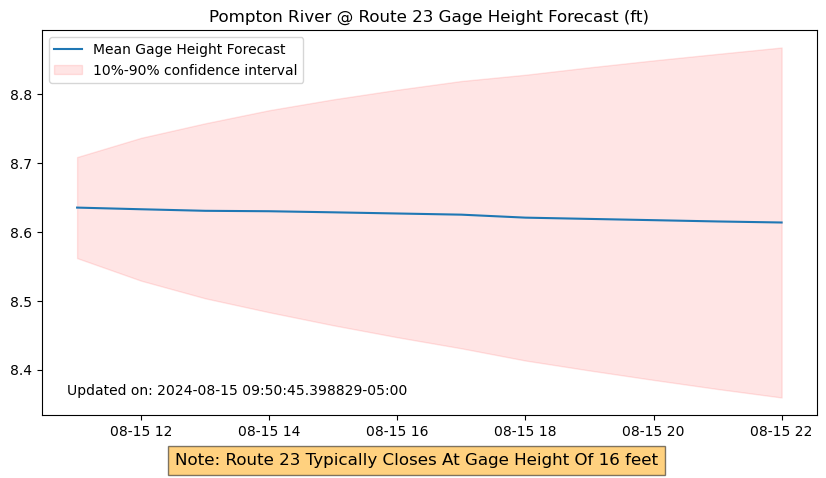

In [16]:
item_id = 'pompton_gage'

plt.figure(figsize=(10, 5))
plt.title('Pompton River @ Route 23 Gage Height Forecast (ft)')


#y_past = test_data.loc[item_id]
y_pred = predictions.loc[item_id]
#y_test = test_data.loc[item_id]["5 Day Volatility"][-48:]

#plt.plot(y_past[-120:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean Gage Height Forecast")
#plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.figtext(0.5, 0.01, "Note: Route 23 Typically Closes At Gage Height Of 16 feet", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.15, 0.15, 'Updated on: '+str(current_dateTime), ha='left', fontsize=10)
plt.legend(loc = 'upper left');
plt.savefig('static/forecast.png')

In [17]:
print('This job completed successfully on: ', current_dateTime)

This job completed successfully on:  2024-08-15 09:50:45.398829-05:00
